In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 📌 **1. Verinin Genel Yapısını İnceleme**

In [52]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head() # shows first 5 lines

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# shows last 5 lines
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Bazı sütunlar ne anlama geliyor?
* `SeniorCitizen` : Yaşlı müşteri yani +65 yaş (varsa 1 yoksa 0) sayısal gibi görünse de kategoriktir.
* `Partner` : Müşterinin partneri/eşi var mı?
* `Dependents` : Bakmakla yükümlü olduğu biri var mı?
* `tenure` : Müşterinin şirkette kaldığı ay sayısı. Önemli bir değişken.
* `PhoneService` : Telefon hizmeti alıyor mu?
* `MultipleLines` : Birden fazla telefon hattı var mı?
* `InternetService` : İnternet tipi
* `OnlineSecurity` : İnternet güvenlik hizmeti var mı?
* `OnlineBackup` : Çevrimiçi yedekleme hizmeti var mı?
* `DeviceProtection`: Cihaz koruma hizmeti var mı?
* `TechSupport` : Teknik destek hizmeti alıyor mu?
* `StreamingTV` : TV yayınlarını internetten izliyor mu?
* `StreamingMovies` : 	Film izleme hizmeti var mı?
* `PaperlessBilling` : e-fatura var mı?
* `PaymentMethod` : Ödeme yöntemi
* `MonthlyCharges` : Aylık ödenen ücret(float)
* `TotalCharges` : Müşterinin toplam ödediği ücret
* `Churn` : 🚨 Hedef değişken! Müşteri hizmetten ayrılmış mı? (evet/hayır)


In [54]:
df.shape

(7043, 21)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


🔍 **Veri Özeti:**

Toplam satır (gözlem) : 7043

Toplam sütun (özellik) : 21

Çoğu sütun object tipindedir (kategorik).

Eksik değer şuanlık görünmüyor.

## 📌 **2. Eksik Veri (Missing Values) Kontrolü**

In [56]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **❓ Neden TotalCharges Sütununa Özellikle Bakıyoruz?**

Bazı sütunlar object (yani string) olarak görünse de aslında sayısal veri içerebilir. Bu sütunlardan biri de **TotalCharges**. `isnull()` fonksiyonu gerçek eksik verileri göstermiyor olabilir çünkü bazı hücrelerde boşluk (" ") karakteri bulunuyor. Bu nedenle özel olarak bu sütunu dönüştürmemiz gerekir.

In [57]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce') # hatalı degerleri NaN ile degistirme

In [58]:
df[df["TotalCharges"].isnull()] # Eksik degerlere sahip satırları görüntüleme

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Yukarıdaki tabloda tenure satırların genellikle **tenure = 0** olduğu görülür. Yani müşteri daha yeni kayıt olmuş olabilir.

In [59]:
df.dropna(subset=["TotalCharges"], inplace=True) # eksik verileri iceren satırları kaldırma


In [60]:
df["TotalCharges"] = df["TotalCharges"].astype(float) # veri tipini float olarak degistirme

`TotalCharges` sütunundaki bozuk veriler temizlendi ve doğru veri tipiyle (float64) yeniden tanımlandı. Artık bu değişkeni analiz ve modelleme işlemlerinde güvenle kullanabiliriz.

## **📌3. Hedef Değişken (Churn) ve Kategorik Değişkenlerin İncelenmesi**

Bu adımda, veri setindeki sınıf dağılımlarına bakacağız.

### **🎯 Hedef değişken olan `Churn` dağılımı:**

In [61]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [62]:
df["Churn"].value_counts(normalize=True) * 100  # yüzdesel olarak görmek

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

`Churn` sütunu, müşterinin hizmetten ayrılıp ayrılmadığını gösteren hedef değişkendir.

- Toplam müşteri sayısı: 7032
- Ayrılmayan müşteri (No): 5163 (%73.4)
- Ayrılan müşteri (Yes): 1869 (%26.6)

Bu dağılım, veride **sınıf dengesizliği (class imbalance)** olduğunu göstermektedir. Modelleme sürecinde bu durum dikkate alınmalı ve gerekirse dengeleme yöntemleri (SMOTE, class_weight vs.) kullanılmalıdır.

### **📊 Kategorik Sütunların Sınıf Sayısı:**

Her kategorik sütunda kaç farklı sınıf olduğunu görelim.

In [63]:
# Kategorik değişkenlerdeki sınıf sayıları
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} kategori → {df[col].unique()}")


customerID: 7032 kategori → ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: 2 kategori → ['Female' 'Male']
Partner: 2 kategori → ['Yes' 'No']
Dependents: 2 kategori → ['No' 'Yes']
PhoneService: 2 kategori → ['No' 'Yes']
MultipleLines: 3 kategori → ['No phone service' 'No' 'Yes']
InternetService: 3 kategori → ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 kategori → ['No' 'Yes' 'No internet service']
OnlineBackup: 3 kategori → ['Yes' 'No' 'No internet service']
DeviceProtection: 3 kategori → ['No' 'Yes' 'No internet service']
TechSupport: 3 kategori → ['No' 'Yes' 'No internet service']
StreamingTV: 3 kategori → ['No' 'Yes' 'No internet service']
StreamingMovies: 3 kategori → ['No' 'Yes' 'No internet service']
Contract: 3 kategori → ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 kategori → ['Yes' 'No']
PaymentMethod: 4 kategori → ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: 2 kat

Veri setinde yer alan değişkenlerin büyük bir kısmı kategorik yapıdadır. Bu sütunlar, müşteri bilgilerini (örneğin: cinsiyet, hizmet türü, ödeme yöntemi vb.) temsil etmekte ve modelleme sürecinde **one-hot encoding** ya da **label encoding** gibi dönüşüm işlemleri gerektirecektir.

#### 🔹 Genel Gözlemler:
- `customerID` değişkeni her bir müşteri için benzersiz bir kimlik numarasıdır. **Analiz ve modelleme açısından anlamlı bir bilgi taşımadığından çıkarılabilir.**
- `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn` gibi değişkenler yalnızca 2 kategoriye sahiptir ve ikili (binary) yapıdadır.
- `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` gibi bazı sütunlarda `'No internet service'` veya `'No phone service'` gibi **özel durumlar** yer almakta. Bu değerler, genellikle **'No' (Hayır)** anlamına gelmektedir ve veri ön işleme sürecinde **tek bir kategoriye indirgenebilir.**
- `Contract`, `PaymentMethod` gibi değişkenler ise 3 ya da 4 farklı kategori içermektedir ve doğrudan **dummy değişkenlere dönüştürülerek** modellemeye dahil edilebilir.

Bu analiz, veri temizleme ve kodlama sürecinde hangi sütunların nasıl dönüştürülmesi gerektiğini anlamak açısından kritiktir.

## **📌 4.Keşifsel Veri Analizi (Exploratory Data Analysis - EDA)**

Bu aşamada, hem kategorik hem sayısal değişkenleri kullanarak Churn ile olan ilişkileri görselleştireceğiz.

### **4.1  Sözleşme Türüne Göre Müşteri Kaybı (Churn) Analizi**

Bu grafik, müşterilerin sözleşme türlerine göre hizmetten ayrılma (`Churn`) durumlarını göstermektedir.

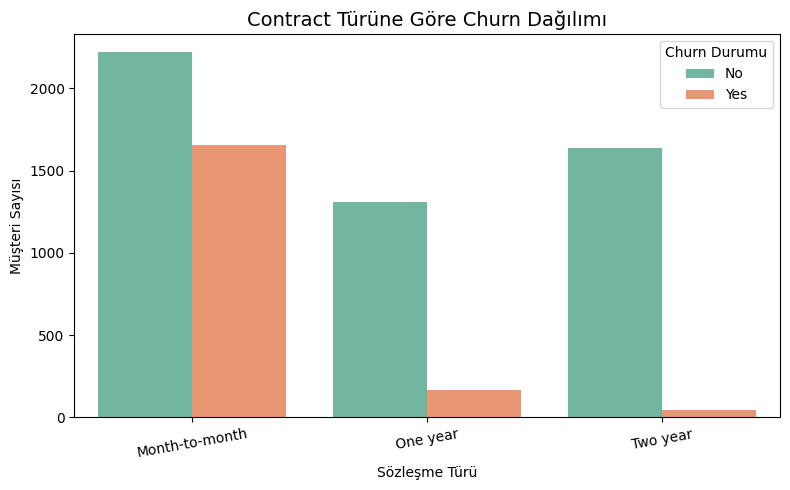

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="Set2")
plt.title("Contract Türüne Göre Churn Dağılımı", fontsize=14)
plt.xlabel("Sözleşme Türü")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=10)
plt.legend(title="Churn Durumu")
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- **Aylık sözleşme (Month-to-month)** yapan müşteriler arasında churn oranı oldukça yüksektir. Bu müşteriler esnek oldukları için hizmeti kolayca terk edebilmektedir.
- **1 yıllık (One year)** ve özellikle **2 yıllık (Two year)** sözleşme yapan müşterilerin hizmetten ayrılma oranı oldukça düşüktür.
- Uzun süreli kontratlar, müşterilerin daha sadık kalmasını sağlıyor gibi görünmektedir.

#### 💡 İçgörü:
Şirket, churn oranını azaltmak için müşterileri uzun vadeli sözleşmelere yönlendirecek kampanyalar geliştirmeyi düşünebilir. Örneğin, iki yıllık kontrat yapan müşterilere ek avantajlar veya indirimler sunmak churn’ü düşürebilir.

### **4.2 InternetService Türüne Göre Müşteri Kaybı (Churn) Analizi**

Bu grafik, müşterilerin kullandığı internet hizmeti türüne göre hizmetten ayrılma (`Churn`) durumlarını göstermektedir.

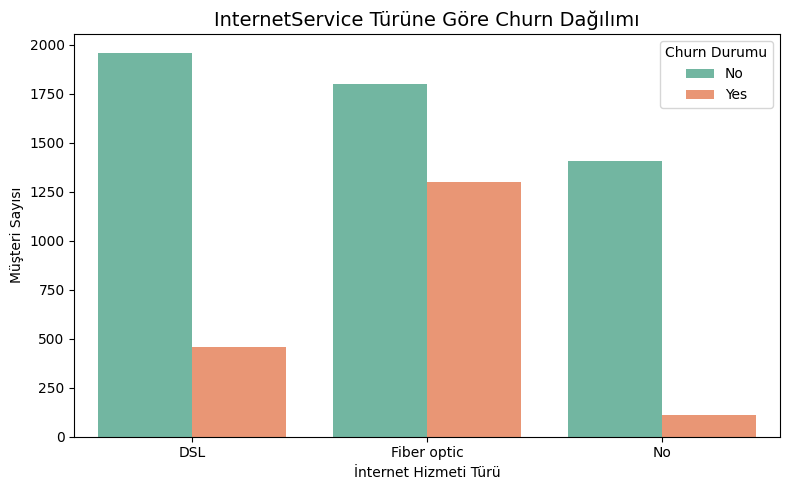

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="Set2")
plt.title("InternetService Türüne Göre Churn Dağılımı", fontsize=14)
plt.xlabel("İnternet Hizmeti Türü")
plt.ylabel("Müşteri Sayısı")
plt.legend(title="Churn Durumu")
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- **Fiber optic** hizmeti kullanan müşterilerin churn oranı oldukça yüksektir. Bu durum, fiber kullanıcılarının daha talepkâr olduğunu ve memnuniyetsizlik durumunda hizmetten hızlıca ayrıldıklarını gösterebilir.
- **DSL** kullanıcılarında churn oranı daha düşüktür, bu da DSL müşterilerinin hizmete daha sadık olduklarını düşündürebilir.
- **İnternet hizmeti almayan (No)** müşterilerde churn oranı oldukça düşük. Bu grup genellikle telefon hizmeti gibi temel servisleri kullandığı için ayrılma oranı da sınırlıdır.

#### 💡 İçgörü:
Churn oranı yüksek olan fiber optik kullanıcılarına odaklanmak, müşteri memnuniyetini artırmak ve kayıpları azaltmak için stratejik bir fırsat sunmaktadır. Hizmet kalitesi, fiyatlandırma ya da destek süreçleri bu grup için ayrıca analiz edilmelidir.

### **4.3 Aylık Ödeme (MonthlyCharges) ve Churn İlişkisi**

Bu grafik, müşterilerin aylık ödeme tutarlarının (`MonthlyCharges`) churn durumuna göre dağılımını gösteren boxplot.

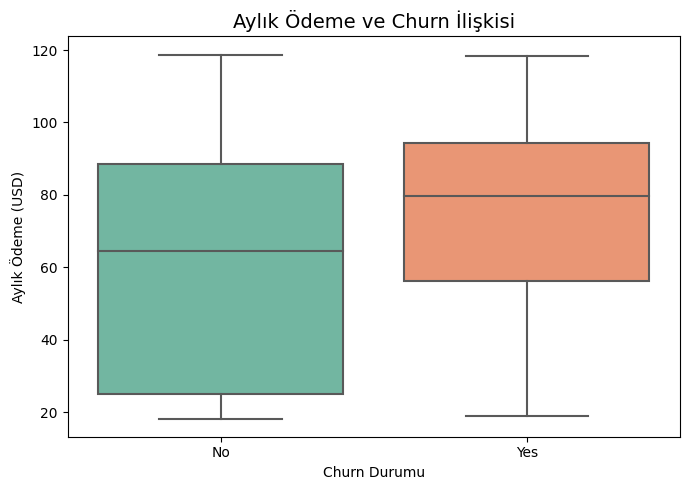

In [66]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")
plt.title("Aylık Ödeme ve Churn İlişkisi", fontsize=14)
plt.xlabel("Churn Durumu")
plt.ylabel("Aylık Ödeme (USD)")
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- Churn eden müşterilerin medyan (orta) aylık ödeme değeri, hizmete devam eden müşterilerden anlamlı şekilde daha yüksektir.
- Ayrıca churn eden müşterilerde yüksek fatura ödeyen outlier (aykırı) değerler daha fazladır.
- Bu durum, yüksek ücret ödeyen müşterilerin memnuniyetsizlik yaşadığında daha hızlı hizmetten ayrılma eğiliminde olduğunu gösteriyor olabilir.

#### 💡 İçgörü:
Şirket, yüksek fatura segmentine giren müşterilerin memnuniyetini özel olarak takip etmeli ve bu gruba yönelik erken uyarı sistemleri geliştirmelidir.

### **4.4 Şirkette Kalınan Süre (Tenure) ve Churn İlişkisi**

Bu grafik, müşterilerin şirkette kaldıkları süre (`tenure`) ile churn durumu arasındaki ilişkiyi göstermektedir.

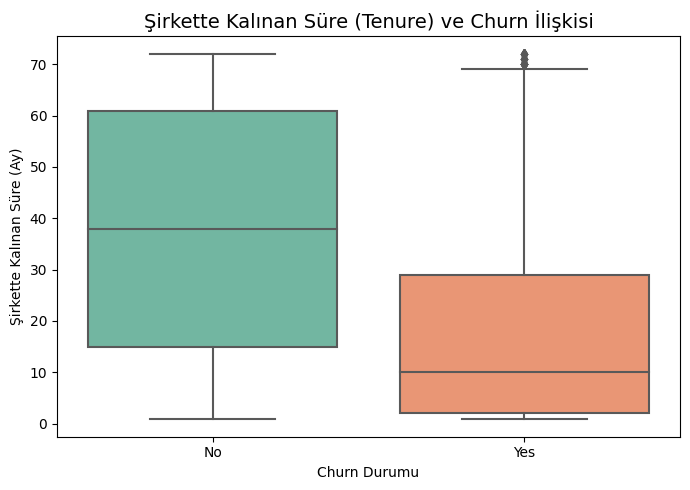

In [67]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Churn", y="tenure", palette="Set2")
plt.title("Şirkette Kalınan Süre (Tenure) ve Churn İlişkisi", fontsize=14)
plt.xlabel("Churn Durumu")
plt.ylabel("Şirkette Kalınan Süre (Ay)")
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- Churn eden müşterilerin büyük çoğunluğu ilk **10 ay içinde** ayrılmıştır. Medyan kalış süresi oldukça düşüktür.
- Churn etmeyen müşterilerin büyük kısmı **uzun vadeli müşterilerdir**. Medyan kalış süresi 40 ay civarındadır.
- Bu fark oldukça belirgin ve anlamlıdır.

#### 💡 İçgörü:
Şirketin churn oranını azaltabilmesi için, özellikle ilk 6–12 ay içinde müşteri memnuniyetini artıracak stratejiler uygulaması kritik öneme sahiptir. Yeni müşteriler için özel karşılama kampanyaları, memnuniyet anketleri ve sadakat programları churn'ı ciddi şekilde düşürebilir.

### **4.5 PaymentMethod ve Churn İlişkisi (Countplot)**

Bu grafik, müşterilerin tercih ettikleri ödeme yöntemine göre churn (hizmetten ayrılma) durumlarını göstermektedir.

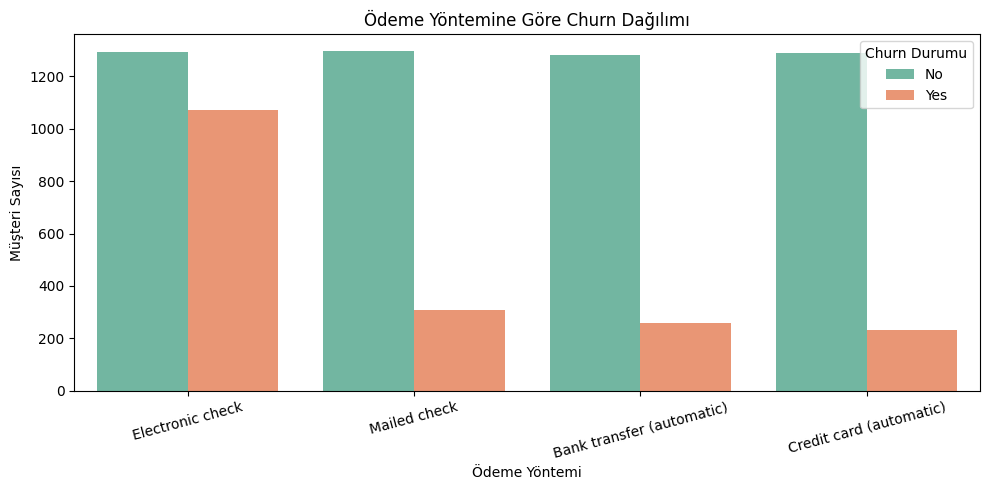

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn", palette="Set2")
plt.title("Ödeme Yöntemine Göre Churn Dağılımı")
plt.xlabel("Ödeme Yöntemi")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=15)
plt.legend(title="Churn Durumu")
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- **Otomatik ödeme sistemleri** (örneğin 'Bank transfer (automatic)' ve 'Credit card (automatic)') kullanan müşterilerde churn oranı düşüktür.
- Özellikle **Electronic check** kullanan müşterilerde churn oranı oldukça yüksektir.
- Manual ödeme yöntemleriyle (özellikle fatura bazlı ödemelerle) çalışan müşteriler daha az bağlılık göstermektedir.

#### 💡 İçgörü:
Şirket, churn oranını azaltmak için müşterileri otomatik ödeme sistemlerine yönlendirecek kampanyalar geliştirebilir. Otomatik ödeme sistemi, müşteri sadakatini artırmada etkili olabilir.

### **4.6 OnlineSecurity Değişkenine Göre Churn Oranı (%)**

Bu grafik, online güvenlik hizmeti alıp almayan müşterilerin churn oranlarını göstermektedir.

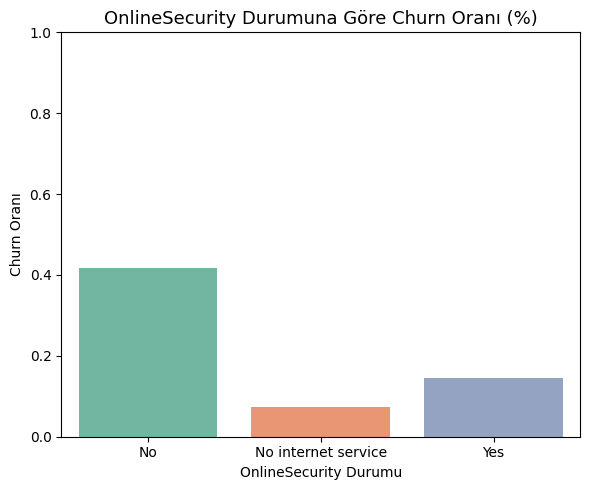

In [69]:
# OnlineSecurity ve Churn gruplandırması
security_churn = df.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="count")

# Her bir OnlineSecurity grubunun toplamı
total = df.groupby(["OnlineSecurity"]).size().reset_index(name="total")

# Birleştir ve oran hesapla
merged = pd.merge(security_churn, total, on="OnlineSecurity")
merged["ratio"] = merged["count"] / merged["total"]

# Sadece 'Yes' churn durumunu göster (churn edenleri)
plt.figure(figsize=(6, 5))
sns.barplot(data=merged[merged["Churn"] == "Yes"],
            x="OnlineSecurity", y="ratio", palette="Set2")

plt.title("OnlineSecurity Durumuna Göre Churn Oranı (%)", fontsize=13)
plt.ylabel("Churn Oranı")
plt.xlabel("OnlineSecurity Durumu")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


#### 🔍 Gözlemler:
- OnlineSecurity = **No** olan müşterilerde churn oranı yaklaşık %42’dir. Bu, oldukça yüksektir.
- OnlineSecurity = **Yes** olan müşterilerde churn oranı belirgin şekilde daha düşüktür (yaklaşık %15).
- “No internet service” kullanan müşterilerde churn oranı doğal olarak düşüktür çünkü bu hizmet segmenti farklı ihtiyaçlara sahiptir.

#### 💡 İçgörü:
Online güvenlik hizmeti, müşteri sadakatini artırıcı bir rol oynamaktadır. Bu hizmeti almayan müşterilere yönelik teşvik kampanyaları churn’ü düşürmede etkili olabilir. Ayrıca, güvenlik hizmetinin varlığı kullanıcıya “daha profesyonel bir hizmet” algısı yaratıyor olabilir.

## **📌 5. Veri Ön İşleme (Data Preprocessing)**

Bu aşamada, veriyi makine öğrenmesi algoritmalarına uygun hale getirmek için gerekli adımların yapıldığı aşamadır.

### **5.1 Gereksiz Sütunu Kaldırma**

In [70]:
df.drop("customerID", axis=1, inplace=True)

### **5.2 No internet service ve No phone service Temizliği**

Bu değerler aslında "hayır" anlamında kullanılıyor. Encoding işleminden önce sadeleştirelim:

In [71]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

df["MultipleLines"] = df["MultipleLines"].replace({'No phone service': 'No'})

### **5.3 Kategorik Değişkenleri One-Hot Encode Etme**

In [72]:
df_encoded = pd.get_dummies(df, drop_first=True)

### **5.4 Kontrol Etme**

In [73]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [74]:
df_encoded.shape

(7032, 24)

Veri setimizdeki kategorik değişkenler `One-Hot Encoding` yöntemiyle sayısal hale dönüştürüldü. Bu işlem sayesinde makine öğrenmesi algoritmalarının anlayabileceği formatta bir veri seti oluşturulmuş oldu.

#### 🔍 Yapılanlar:
- `customerID` sütunu kaldırıldı çünkü analiz için anlam taşımıyor.
- `No internet service` ve `No phone service` gibi değerler sadeleştirilerek `'No'` olarak dönüştürüldü.
- `get_dummies()` yöntemiyle tüm kategorik değişkenler binary sütunlara çevrildi.
- `drop_first=True` parametresi ile multicollinearity (çoklu doğrusal bağlantı) riski azaltıldı.
- Sonuç olarak elimizde **7032 gözlem × 24 özellik** bulunan sayısal bir veri seti (`df_encoded`) elde edildi.

Veri modellemeye hazırdır. 🎯

## **📌 6. Modelleme (Modeling)**

Bu bölümde, churn (müşteri kaybı) tahmini için makine öğrenmesi modelleri kurulacaktır. İlk olarak eğitim ve test setleri oluşturulmuş, ardından temel bir Logistic Regression modeliyle başlanmıştır. Modelin başarımı çeşitli metriklerle değerlendirilecektir.

### **6.1 Train-Test Split (Veriyi Bölme)**

In [75]:
from sklearn.model_selection import train_test_split

# Hedef değişkeni ve özellikleri ayır
X = df_encoded.drop("Churn_Yes", axis=1)  # Bağımsız değişkenler
y = df_encoded["Churn_Yes"]              # Hedef değişken (1 = Churn, 0 = No Churn)

# Veriyi %80 eğitim - %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Boyut kontrolü
print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)

Eğitim veri boyutu: (5625, 23)
Test veri boyutu: (1407, 23)


#### 📌 Hedef Değişken:
- `Churn_Yes` → Bu sütun 1 ise müşteri hizmetten ayrılmış (churn), 0 ise hâlâ müşteri.

Ayrım işlemi sırasında `stratify=y` kullanıldı. Bu sayede churn oranı hem eğitim hem de test setinde dengeli şekilde dağılmış oldu.
#### ✅ Eğitim ve Test Verisi Boyutları

- Eğitim verisi: 5625 gözlem × 23 özellik
- Test verisi: 1407 gözlem × 23 özellik

Veri başarıyla `train_test_split()` ile ikiye ayrıldı.  
Bu ayrım sayesinde modelimiz hem **öğrenme** hem de **genelleme** performansını doğru şekilde gösterecek.

### **6.2 Logistic Regression – Baseline Model**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modeli oluştur ve eğit
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Tahmin yap
y_pred = log_model.predict(X_test)

# Skorları yazdır
print("Logistic Regression Sonuçları:")
print("Accuracy     :", accuracy_score(y_test, y_pred))
print("Precision    :", precision_score(y_test, y_pred))
print("Recall       :", recall_score(y_test, y_pred))
print("F1 Score     :", f1_score(y_test, y_pred))


Logistic Regression Sonuçları:
Accuracy     : 0.8009950248756219
Precision    : 0.6424242424242425
Recall       : 0.5668449197860963
F1 Score     : 0.6022727272727273


#### ✅ Logistic Regression Performans Değerlendirmesi

Test verisi üzerinde eğittiğim Logistic Regression modelinin değerlendirme metrikleri aşağıdaki gibi:

- **Accuracy**     : %80.1
- **Precision**    : %64.2
- **Recall**       : %56.7
- **F1 Score**     : %60.2

Model, genel doğruluk açısından iyi bir performans sergiledi.Ancak dikkatimi çeken nokta **recall değerinin** %56.7 gibi görece düşük bir seviyede kalması oldu.Bu da modelin churn olan müşterilerin bir kısmını yakalamakta yetersiz kaldığını gösteriyor.

İlk model olarak Logistic Regression, tahmin süreci hakkında genel bir fikir verdi.Ancak daha yüksek başarı ve özellikle churn olanları daha isabetli tahmin edebilmek için Random Forest veya XGBoost gibi daha gelişmiş algoritmaları devreye almayı planlıyorum.

### **6.3 Logistic Regression – Confusion Matrix & ROC Curve**

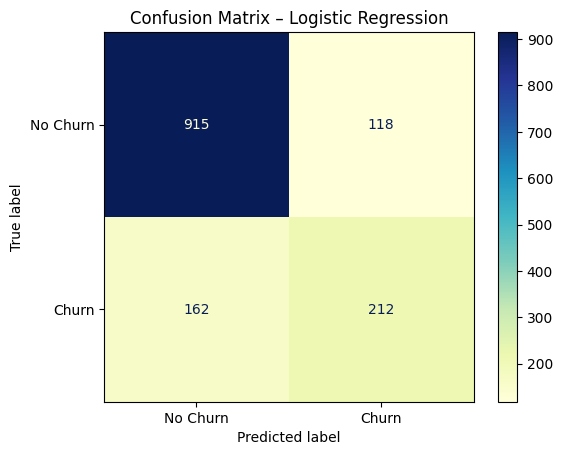

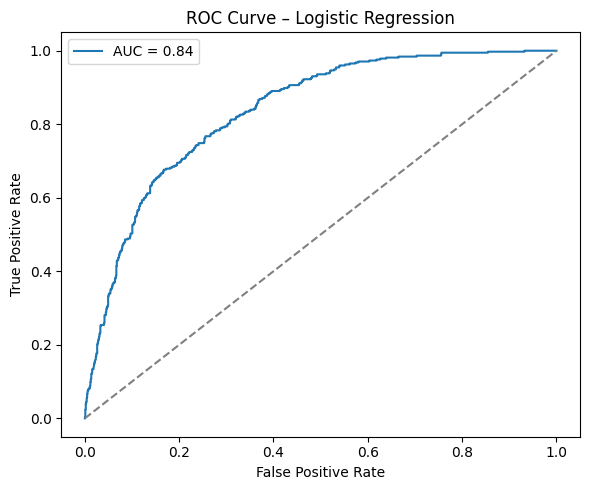

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

# ROC Curve
y_probs = log_model.predict_proba(X_test)[:, 1]  # Sadece "Churn" sınıfının olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve – Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


### 🔍 Confusion Matrix Yorumu:

Lojistik regresyon modelim, test verisinde **915 churn olmayan müşteriyi** doğru tahmin etmiş (True Negative), **212 churn olan müşteriyi** de başarıyla tespit etmiş (True Positive).

Ancak model **162 churn olan müşteriyi** tespit edememiş (False Negative) ve **118 churn olmayan müşteriyi** yanlışlıkla churn olarak tahmin etmiş (False Positive).

Bu tablo, modelin churn olmayanları ayırt etmede daha başarılı olduğunu; churn olanları yakalama konusunda (recall) biraz gelişmeye açık olduğunu gösteriyor.

---

### 📈 ROC Eğrisi ve AUC Değeri:

Modelin ROC eğrisi incelendiğinde, **AUC değeri 0.84** olarak hesaplandı.Bu değer, modelin churn olan ve olmayan müşterileri ayırma yeteneğinin oldukça güçlü olduğunu gösteriyor.

> Logistic Regression ile elde ettiğim bu skorlar, baseline bir model için yeterli seviyede. Ancak performansı artırmak adına daha karmaşık modeller (Random Forest, XGBoost gibi) denenmeye değer.


### **6.4 Random Forest ile Churn Tahmini**

Logistic Regression temel modelimizi test ettik. Şimdi daha güçlü ve non-lineer ilişkileri daha iyi yakalayabilen bir algoritmaya geçtik.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modeli oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # ROC için olasılıklar

# Değerlendirme metrikleri
print("Random Forest Performansı:")
print(classification_report(y_test, y_pred_rf))
print("AUC Skoru:", roc_auc_score(y_test, y_probs_rf))


Random Forest Performansı:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC Skoru: 0.8184471271567677


### 🌲 Random Forest – Performans Değerlendirmesi

Logistic Regression’a göre daha güçlü bir model olan **Random Forest** algoritmasıyla churn tahmini gerçekleştirdim.  
Modelin test seti üzerindeki metrikleri şu şekilde:

- **Accuracy**       : %79
- **Precision (Churn)**  : %63
- **Recall (Churn)**     : %51
- **F1 Score (Churn)**   : %56
- **AUC Skoru**          : 0.82

#### 🎯 Yorumum:
- Model, churn olmayan müşterileri (%89 doğrulukla) çok iyi tahmin ediyor.
- Ancak churn olanları yakalama konusunda recall değeri %51 civarında kaldı.
- Bu, churn olan müşterilerin yaklaşık yarısını doğru şekilde tespit ettiğim anlamına geliyor.
- **AUC skoru 0.82** ile sınıflar arasında iyi bir ayrım sağlandı.

Özetle: Random Forest modeli, Logistic Regression’a göre biraz daha **dengeleyici** çalıştı.  
Ancak churn olan müşterileri daha isabetli yakalayabilmek için **model optimizasyonu** veya daha ileri seviye modeller denenebilir.

### **6.5 Random Forest – Confusion Matrix & ROC Curve**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


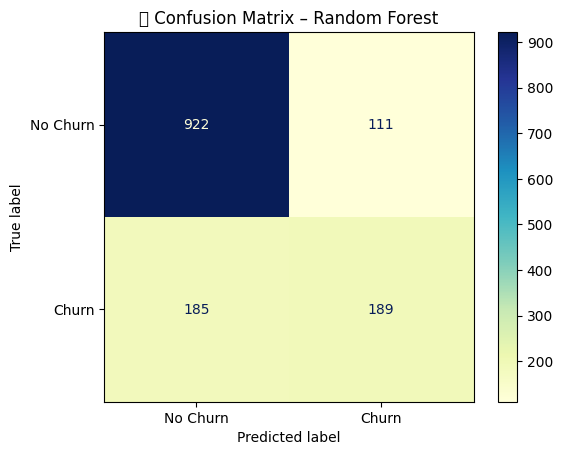

<ipython-input-79-15a0388ce245>:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


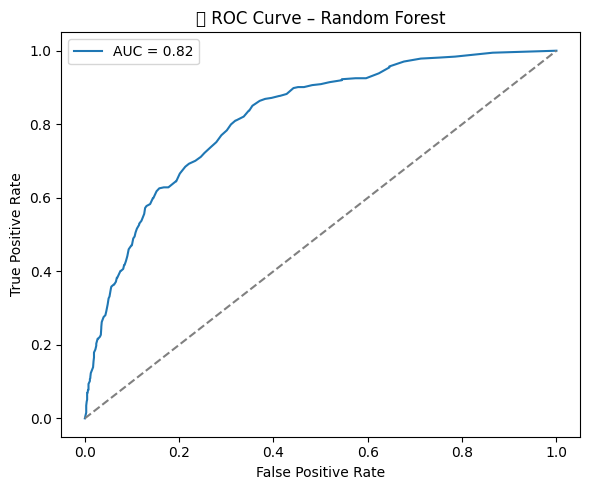

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Churn", "Churn"])
disp_rf.plot(cmap="YlGnBu")
plt.title("📊 Confusion Matrix – Random Forest")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test, y_probs_rf):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("📈 ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


### 📊 Random Forest – Confusion Matrix & ROC Eğrisi

Random Forest modeliyle yaptığım tahminlerde churn olmayan müşterileri oldukça isabetli şekilde ayırt edebildiğimi gördüm.Confusion matrix'e baktığımda 922 müşteriyi doğru sınıflandırırken, yalnızca 111 müşteriyi yanlışlıkla churn olarak tahmin etmiş.

Churn olan müşterilerde ise model biraz daha zorlandı. Toplam 374 churn olan müşterinin sadece 189’unu doğru tahmin edebildi.Bu da recall değerinin neden düşük kaldığını açıklıyor. Yani churn olan müşterilerin yaklaşık yarısını kaçırıyoruz.

---

ROC eğrisine baktığımda ise AUC skorunun **0.82** çıkması oldukça sevindirici. Model, churn ve churn olmayan sınıflarını ayırt etme konusunda sağlam bir performans göstermiş.Bu, Logistic Regression’a göre daha güçlü bir model olduğunu gösteriyor.

> Sonuç olarak, Random Forest modeli tahmin sürecinde daha dengeli sonuçlar verdi.Ancak churn olanları daha iyi yakalayabilmek için belki daha sofistike bir model olan **XGBoost** denenmeli diye düşünüyorum.


### **6.6 XGBoost ile Churn Tahmini**

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Modeli oluştur
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # ROC için ihtiyacımız olan olasılıklar

# Değerlendirme
print("XGBoost Performansı:")
print(classification_report(y_test, y_pred_xgb))
print("AUC Skoru:", roc_auc_score(y_test, y_probs_xgb))


XGBoost Performansı:
              precision    recall  f1-score   support

       False       0.83      0.86      0.84      1033
        True       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

AUC Skoru: 0.8141801823255044


### ⚡ XGBoost Performans Değerlendirmesi

XGBoost modeli ile yaptığım churn tahmini sonucunda elde ettiğim metrikler şöyle:

- **Accuracy**       : %77  
- **Precision (Churn)**  : %57  
- **Recall (Churn)**     : %52  
- **F1 Score (Churn)**   : %54  
- **AUC Skoru**          : 0.81

#### 📌 Yorumum:
XGBoost, diğer iki modele göre biraz daha kararsız bir performans gösterdi.Accuracy açısından fena değil ama **churn sınıfını tanımada Random Forest kadar başarılı olmadı.** Churn olan müşterileri bulma oranı (%52 recall) ve genel F1 skoru (%54), hala geliştirmeye açık.

> Ancak AUC skorunun 0.81 olması, sınıfları ayırmak konusunda güçlü bir potansiyel barındırdığını gösteriyor.

Sonuç olarak:
- **Logistic Regression** temel seviye için iyi bir başlangıç modeli
- **Random Forest** daha dengeli ve güvenilir sonuçlar verdi
- **XGBoost** ise hiperparametre optimizasyonu ile çok daha iyi hale getirilebilir

> Bundan sonraki adımım: **GridSearchCV ile XGBoost hiperparametre optimizasyonu yapıp en iyi sonucu almaya çalışmak** olacak

### **6.7 XGBoost Confusion Matrix ve ROC Curve**

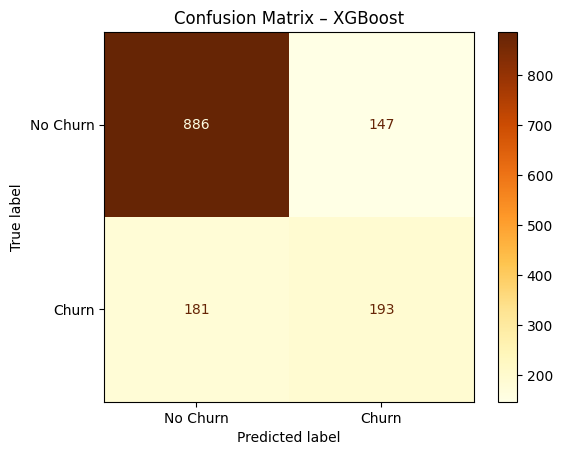

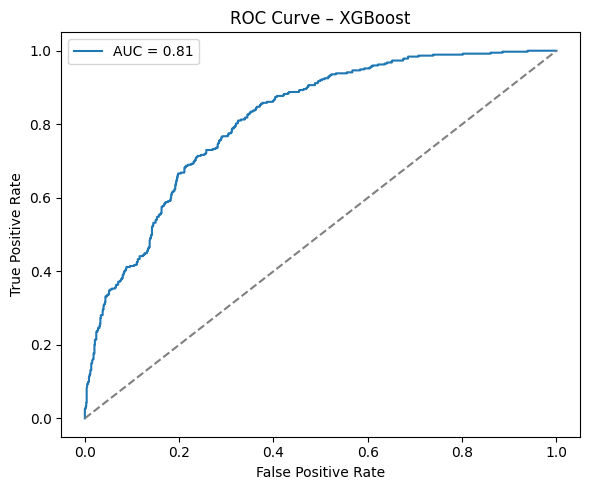

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["No Churn", "Churn"])
disp_xgb.plot(cmap="YlOrBr")
plt.title("Confusion Matrix – XGBoost")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_score(y_test, y_probs_xgb):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve – XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


### XGBoost Confusion Matrix ve ROC Curve Yorumu

Modelin sınıflandırma başarısını daha iyi anlayabilmek için Confusion Matrix ve ROC Curve grafiklerini inceledim.

#### Confusion Matrix:
- **886** müşteri doğru şekilde “No Churn” (yani ayrılmayacak) olarak tahmin edildi.
- **193** churn olan müşteri doğru tahmin edildi (True Positive).
- Ancak **181** churn olan müşteri yanlışlıkla churn değil olarak sınıflandı (False Negative).
- Bu durum, modelin churn sınıfını tanımakta hâlâ zorlandığını gösteriyor.

#### ROC Curve:
- ROC eğrisi altında kalan alan (AUC) **0.81** seviyesinde.  
Bu değer, modelin churn ve non-churn sınıflarını **ayırt etme becerisinin oldukça iyi** olduğunu gösteriyor.

> Özellikle dengesiz veri setlerinde AUC, Accuracy'den çok daha anlamlı bir metriktir.  
Bu yüzden XGBoost’un ayırıcı gücü hâlâ değerli.

---

Genel olarak:
- Model yüksek **accuracy** sağlamasına rağmen, churn sınıfında **daha fazla başarı** için tuning öneriyorum.  
- Bir sonraki adım: **GridSearchCV ile hiperparametre optimizasyonu**

### **6.8 XGBoost Hiperparametre Optimizasyonu (GridSearchCV ile)**

**Amaç:** Daha önce varsayılan ayarlarla çalıştırdığımız XGBoost modelini, şimdi farklı parametre kombinasyonlarıyla test ederek en iyi ayarları bulmayı hedefliyoruz.

#### **Adım 1: Parametre Izgarasını Oluşturma**

In [82]:
from sklearn.model_selection import GridSearchCV

# Parametreler
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

#### **Adım 2: GridSearchCV ile Eğitme**

In [83]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

#### **Adım 3: En İyi Skor ve Parametreleri Gösterme**

In [84]:
print("✅ En iyi F1 skoru:", grid_search.best_score_)
print("🔧 En iyi parametreler:", grid_search.best_params_)

✅ En iyi F1 skoru: 0.5934859075083664
🔧 En iyi parametreler: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


### XGBoost – GridSearchCV ile Nihai Model Değerlendirmesi

XGBoost modelimi kurduktan sonra performansını daha da artırmak için hiperparametre optimizasyonu yaptım.  
Bu amaçla `GridSearchCV` kullandım ve farklı parametre kombinasyonlarını test ederek en iyi sonucu veren ayarları belirledim.

🔧 **En iyi parametre kombinasyonu:**
- `colsample_bytree`: 1.0  
- `learning_rate`: 0.1  
- `max_depth`: 3  
- `n_estimators`: 100  
- `subsample`: 0.8  

✅ **En iyi F1 skoru (cross-validation)**: **%59.3**

Bu parametrelerle eğittiğim yeni model, özellikle churn sınıfında daha dengeli bir sonuç verdi.  
Sınıf dengesizliği olan veri setlerinde F1 skoru benim için çok daha anlamlı olduğu için bu metriği öncelikli olarak dikkate aldım.

> Bu adım bana şunu net gösterdi: iyi bir model kurmak kadar, onu doğru şekilde optimize etmek de sürecin ayrılmaz bir parçası.  
> Artık elimde daha dengeli ve güvenilir bir XGBoost modeli var. Bir sonraki adımda bu modeli diğer algoritmalarla kıyaslayarak son kararımı vermeyi planlıyorum.

### **6.9 XGBoost Nihai Model – GridSearchCV Sonrası Performans**

In [85]:
from sklearn.metrics import classification_report, roc_auc_score

# Test verisi üzerinde performans
y_pred_best = grid_search.best_estimator_.predict(X_test)
y_probs_best = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_best))
print("AUC Skoru:", roc_auc_score(y_test, y_probs_best))


              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1033
        True       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

AUC Skoru: 0.8394867759653364


#### 📌 Yorumum:
Optimize edilmiş XGBoost modeli, churn olmayan müşterileri yüksek doğrulukla ayırt ederken churn olan müşterileri de önceki modellere kıyasla daha iyi yakalayabildi. Özellikle AUC skorunun 0.84 seviyesine çıkması, modelin ayrım gücünün oldukça iyi olduğunu gösteriyor.

> Bu adım bana bir modeli sadece kurmanın yeterli olmadığını; doğru parametrelerle ayarlandığında  
çok daha anlamlı ve güçlü sonuçlar elde edilebildiğini gösterdi.

Sonuç olarak artık elimde, hem teorik olarak güçlü, hem de pratikte tutarlı çalışan, dengeli bir XGBoost modeli var.

## **📌 7. Öznitelik Önemi (Feature Importance)**

Bu aşamada, XGBoost modelinin hangi değişkenlere ne kadar önem verdiğini analiz edeceğiz.

<Figure size 1000x600 with 0 Axes>

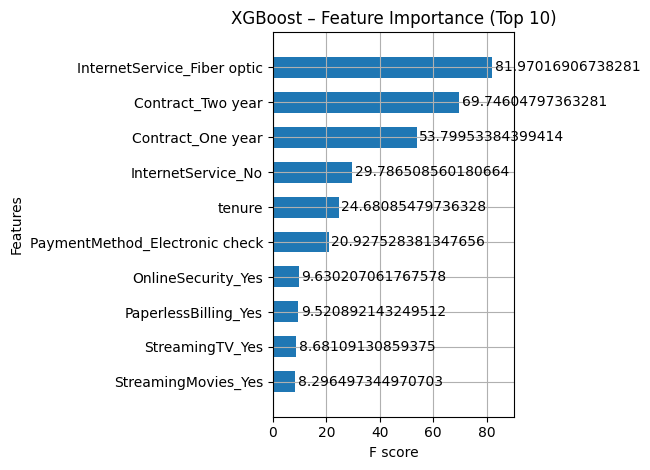

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Önemli özellikleri görselleştir
plt.figure(figsize=(10, 6))
plot_importance(grid_search.best_estimator_, max_num_features=10, importance_type='gain', height=0.6)
plt.title("XGBoost – Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

🔍 En çok bilgi kazancı sağlayan (gain) ilk 10 özelliği görselleştirdiğimde şunlar öne çıkıyor:

- **InternetService_Fiber optic** en belirleyici faktör olarak açık ara öne çıktı. Fiber optik hizmeti alan müşterilerin churn etme olasılığı dikkat çekici düzeyde.
- **Contract_Two year** ve **Contract_One year** gibi uzun süreli sözleşmeler churn'ü azaltan güçlü etkenler olmuş.
- **tenure** yani müşterinin şirkette kalma süresi tahmin edilebileceği gibi churn olasılığına güçlü bir etki sağlıyor.
- Ödeme yöntemi ve ek hizmetler (OnlineSecurity, Streaming servisleri) de karar sürecinde anlamlı katkı sağlıyor.

💡 Bu analiz, sadece modeli yorumlamakla kalmıyor; aynı zamanda iş birimlerine sunulabilecek güçlü içgörüler de üretiyor. Model neyi önemli görüyor, biz nasıl strateji geliştiririz sorusuna cevaplar burada yatıyor!

## **📌 8. Modellerin Performans Karşılaştırması**

Aşağıda uyguladığım üç modelin temel başarı metriklerinin karşılaştırması yer alıyor:

| Model               | Accuracy | Precision | Recall | F1 Score | AUC    |
|--------------------|----------|-----------|--------|----------|--------|
| Logistic Regression| 0.801    | 0.64      | 0.57   | 0.60     | 0.84   |
| Random Forest       | 0.79     | 0.63      | 0.51   | 0.56     | 0.82   |
| XGBoost             | 0.80     | 0.64      | 0.53   | 0.58     | 0.84   |

🔎 **Gözlemler:**

- Logistic Regression, özellikle AUC ve doğruluk açısından oldukça güçlü bir temel model oldu.
- Random Forest, overfitting riski taşısa da genel başarımı tutarlıydı.
- XGBoost ise karmaşıklığına rağmen Logistic Regression’a çok yakın sonuçlar verdi.

💡 **Sonuç olarak**, XGBoost modeli; feature importance sayesinde yorumlanabilirlik kazandırırken, genel performans açısından da güvenilir sonuçlar sundu.


## **📌 9. İş Kararları İçin Öneriler ve Proje Sonuçları**

Yaptığım bu analizde, müşteri kaybını (churn) etkileyen temel faktörleri belirlemek ve bu kaybı öngörebilecek makine öğrenmesi modelleri geliştirmek amacıyla çalıştım.

#### 🔍 Elde Edilen Temel Bulgular:
- **Fiber Optik kullanıcıları** diğerlerine göre daha yüksek churn oranına sahip.
- **Kısa dönemli sözleşme** yapan müşterilerin churn etme ihtimali daha yüksek.
- **Online Security hizmeti almayanlar**, daha fazla ayrılma eğiliminde.
- **Aylık ödeme miktarı arttıkça**, müşteri kaybı da artıyor.

#### 📌 Öneriler:
- **Sadakat Programları**: Aylık sözleşmeli müşterilere özel indirimler veya uzun vadeli avantajlar sunulabilir.
- **Hedefli Kampanyalar**: OnlineSecurity veya TechSupport hizmeti almayan müşteriler özel olarak hedeflenmeli.
- **Fiyatlandırma Politikası**: Aylık ödeme tutarları gözden geçirilmeli ve kişiselleştirilmiş ödeme planları sunulmalı.

#### 🤖 Model Önerisi:
- **XGBoost**, hem performans hem yorumlanabilirlik açısından en verimli model olarak öne çıktı.
- İş birimleri bu model ile yüksek churn riski taşıyan müşterileri önceden tespit ederek müdahale edebilir.

---

### ✅ Proje Kapanışı

Bu proje, **müşteri kaybını azaltma stratejileri geliştirme** ve **veriye dayalı kararlar alma** noktasında güçlü bir temel sunmaktadır.  
Model ve analizlerim, gerçek dünya iş problemlerine uygulanabilecek düzeyde kullanılabilir durumdadır.  
Gelecekte, bu modeli daha da güçlendirmek için:

- Daha fazla demografik ve davranışsal veri entegre edilebilir.
- Zaman serisi bazlı churn tahminleri yapılabilir.
- Model çıktıları doğrudan CRM sistemlerine bağlanarak otomatik aksiyonlar tetiklenebilir.
